In [13]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import xarray as xr

from mapper_functions import plot_global

from my_functions import read_obsfcstana
from my_functions import read_obsfcstana_extend_datetime

In [2]:
# Produce with extended date_time

expt_name = 'DAv7_M36_ASCAT_type_2_strict_QC'

# Define the list of years
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Define the common file name start
file_name_start = expt_name + '.ens_avg.ldas_ObsFcstAna.20'

# Define the print flag
printflag = False

# Loop over the years
for i in range(len(years)-1):
    # Define the current and next year
    current_year = years[i]
    next_year = years[i+1]
    # Define the list of paths
    paths = []
    for month in range(4, 13):
        path = f'/discover/nobackup/amfox/Experiments/{expt_name}/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y{current_year}/M{month:02d}'
        paths.append(path)

    for month in range(1, 4):
        path = f'/discover/nobackup/amfox/Experiments/{expt_name}/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y{next_year}/M{month:02d}'
        paths.append(path)
    
    # Initialize lists to store the returned values
    date_times = []
    obs_species_list = []
    obs_tilenum_list = []
    obs_lon_list = []
    obs_lat_list = []
    obs_obs_list = []
    obs_fcst_list = []
    obs_ana_list = []
    
    # Loop over the paths for the current year
    for path in paths:
        # Print the current path
        print("Current path:", path)

        # Call the read_obsfcstana function for the current path
        date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)
        
        # Append the returned values to the lists
        date_times.append(date_time)
        obs_species_list.append(obs_species)
        obs_tilenum_list.append(obs_tilenum)
        obs_lon_list.append(obs_lon)
        obs_lat_list.append(obs_lat)
        obs_obs_list.append(obs_obs)
        obs_fcst_list.append(obs_fcst)
        obs_ana_list.append(obs_ana)
    
    # Combine the returned values from all paths
    date_time_out = np.concatenate(date_times)
    obs_species_out = np.concatenate(obs_species_list)
    obs_tilenum_out = np.concatenate(obs_tilenum_list)
    obs_lon_out = np.concatenate(obs_lon_list)
    obs_lat_out = np.concatenate(obs_lat_list)
    obs_obs_out = np.concatenate(obs_obs_list)
    obs_fcst_out = np.concatenate(obs_fcst_list)
    obs_ana_out = np.concatenate(obs_ana_list)
    
    # Save the returned values to a file including the current year in the file name
    np.savez(f'{expt_name}_obsfcstana_extend_datetime_{current_year}.npz', date_time=date_time_out, obs_species=obs_species_out, obs_tilenum=obs_tilenum_out, obs_lon=obs_lon_out, obs_lat=obs_lat_out, obs_obs=obs_obs_out, obs_fcst=obs_fcst_out, obs_ana=obs_ana_out)

Current path: /discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_strict_QC/DAv7_M36_ASCAT_type_2_strict_QC/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04
Current path: /discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_strict_QC/DAv7_M36_ASCAT_type_2_strict_QC/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M05
Current path: /discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_strict_QC/DAv7_M36_ASCAT_type_2_strict_QC/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06
Current path: /discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_strict_QC/DAv7_M36_ASCAT_type_2_strict_QC/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M07
Current path: /discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_strict_QC/DAv7_M36_ASCAT_type_2_strict_QC/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08
Current path: /discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_strict_QC/DAv7_M36_ASCAT_type_2_strict_QC/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M0

In [3]:
# Open each of the saved files
data_2015 = np.load(f'{expt_name}_obsfcstana_2015.npz', allow_pickle=True)
data_2016 = np.load(f'{expt_name}_obsfcstana_2016.npz', allow_pickle=True)
data_2017 = np.load(f'{expt_name}_obsfcstana_2017.npz', allow_pickle=True)
data_2018 = np.load(f'{expt_name}_obsfcstana_2018.npz', allow_pickle=True)
data_2019 = np.load(f'{expt_name}_obsfcstana_2019.npz', allow_pickle=True)
data_2020 = np.load(f'{expt_name}_obsfcstana_2020.npz', allow_pickle=True)

In [4]:
# Extract and combine the data from each of the files
date_time = np.concatenate((data_2015['date_time'], data_2016['date_time'], data_2017['date_time'], data_2018['date_time'], data_2019['date_time'], data_2020['date_time']))
obs_species = np.concatenate((data_2015['obs_species'], data_2016['obs_species'], data_2017['obs_species'], data_2018['obs_species'], data_2019['obs_species'], data_2020['obs_species']))
obs_tilenum = np.concatenate((data_2015['obs_tilenum'], data_2016['obs_tilenum'], data_2017['obs_tilenum'], data_2018['obs_tilenum'], data_2019['obs_tilenum'], data_2020['obs_tilenum']))
# obs_lon = np.concatenate((data_2015['obs_lon'], data_2016['obs_lon'], data_2017['obs_lon'], data_2018['obs_lon'], data_2019['obs_lon'], data_2020['obs_lon']))
# obs_lat = np.concatenate((data_2015['obs_lat'], data_2016['obs_lat'], data_2017['obs_lat'], data_2018['obs_lat'], data_2019['obs_lat'], data_2020['obs_lat']))
obs_obs = np.concatenate((data_2015['obs_obs'], data_2016['obs_obs'], data_2017['obs_obs'], data_2018['obs_obs'], data_2019['obs_obs'], data_2020['obs_obs']))
obs_fcst = np.concatenate((data_2015['obs_fcst'], data_2016['obs_fcst'], data_2017['obs_fcst'], data_2018['obs_fcst'], data_2019['obs_fcst'], data_2020['obs_fcst']))
obs_ana = np.concatenate((data_2015['obs_ana'], data_2016['obs_ana'], data_2017['obs_ana'], data_2018['obs_ana'], data_2019['obs_ana'], data_2020['obs_ana']))

In [5]:
# Calculate obs minus fcst
obs_minus_fcst = []
for i in range(len(obs_obs)):
    obs_minus_fcst_chunk = obs_obs[i] - obs_fcst[i]
    obs_minus_fcst.append(obs_minus_fcst_chunk)
    
# Calculate obs minus ana
obs_minus_ana = []
for i in range(len(obs_obs)):
    obs_minus_ana_chunk = obs_obs[i] - obs_ana[i]
    obs_minus_ana.append(obs_minus_ana_chunk)
    
# Convert the lists to numpy arrays
obs_minus_fcst = np.array(obs_minus_fcst)
obs_minus_ana = np.array(obs_minus_ana)



In [6]:
# Find unique tilenum values
unique_tilenum = np.unique(obs_tilenum)

# Find the number of unique tilenum values
num_unique_tilenum = len(unique_tilenum)

# Print the number of unique tilenum values
print(f"Number of unique tilenum values: {num_unique_tilenum}")

Number of unique tilenum values: 26074


In [7]:
# Sort the arrays based on obs_tilenum
sort_indices = np.argsort(obs_tilenum)
sorted_obs_tilenum = obs_tilenum[sort_indices]
sorted_obs_species = obs_species[sort_indices]
sorted_obs_obs = obs_obs[sort_indices]
sorted_obs_fcst = obs_fcst[sort_indices]
sorted_obs_ana = obs_ana[sort_indices]
sorted_obs_minus_fcst = obs_minus_fcst[sort_indices]
sorted_obs_minus_ana = obs_minus_ana[sort_indices]

# Find the unique tilenum values and their counts
unique_tilenum, counts = np.unique(sorted_obs_tilenum, return_counts=True)

# Calculate the indices where the groups should be split
split_indices = np.cumsum(counts)[:-1]

# Split the sorted arrays based on the split indices
obs_species_grouped = np.split(sorted_obs_species, split_indices)
obs_obs_grouped = np.split(sorted_obs_obs, split_indices)
obs_fcst_grouped = np.split(sorted_obs_fcst, split_indices)
obs_ana_grouped = np.split(sorted_obs_ana, split_indices)
obs_minus_fcst_grouped = np.split(sorted_obs_minus_fcst, split_indices)
obs_minus_ana_grouped = np.split(sorted_obs_minus_ana, split_indices)

# Print the length of obs_obs_grouped
print(f"Length of obs_obs_grouped: {len(obs_obs_grouped)}")

Length of obs_obs_grouped: 26074


In [8]:
# Find the number of observations for each tilenum
num_obs = []
for i in range(num_unique_tilenum):
    num_obs.append(len(obs_obs_grouped[i]))

In [9]:
# Run this cell if you have a single sensor experiment

# Find the number of observations for each tilenum
num_obs = []
for i in range(num_unique_tilenum):
    num_obs.append(len(obs_obs_grouped[i]))

# Calculate the mean obs_obs for each tilenum
mean_obs_obs = []
for i in range(num_unique_tilenum):
    mean_obs_obs.append(np.mean(obs_obs_grouped[i]))

# Calculate the mean obs_fcst for each tilenum
mean_obs_fcst = []
for i in range(num_unique_tilenum):
    mean_obs_fcst.append(np.mean(obs_fcst_grouped[i]))

# Calculate the mean obs_ana for each tilenum
mean_obs_ana = []
for i in range(num_unique_tilenum):
    mean_obs_ana.append(np.mean(obs_ana_grouped[i]))

# Calculate the mean obs_minus_fcst for each tilenum
mean_obs_minus_fcst = []
for i in range(num_unique_tilenum):
    mean_obs_minus_fcst.append(np.mean(obs_minus_fcst_grouped[i]))

# Calculate the mean obs_minus_ana for each tilenum
mean_obs_minus_ana = []
for i in range(num_unique_tilenum):
    mean_obs_minus_ana.append(np.mean(obs_minus_ana_grouped[i]))

# Calculate the standard deviation of obs_minus_fcst for each tilenum
std_obs_minus_fcst = []
for i in range(num_unique_tilenum):
    std_obs_minus_fcst.append(np.std(obs_minus_fcst_grouped[i]))

# Calculate the standard deviation of obs_minus_ana for each tilenum
std_obs_minus_ana = []
for i in range(num_unique_tilenum):
    std_obs_minus_ana.append(np.std(obs_minus_ana_grouped[i]))

In [10]:
# Specify the path to the netCDF file
file_path = '/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2/DAv7_M36_ASCAT_type_2/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M04/DAv7_M36_ASCAT_type_2.catch_progn_incr.20150402.nc4'

# Open the netCDF file
dataset = xr.open_dataset(file_path)

# Extract the lon and lat variables
lon = dataset['lon']
lat = dataset['lat']

# Print the dimensions of the variables
print(f"Dimensions of lon: {lon.shape}")
print(f"Dimensions of lat: {lat.shape}")

Dimensions of lon: (112573,)
Dimensions of lat: (112573,)


In [11]:
# Assign lon and lat to each tilenum
lon_tilenum = []
lat_tilenum = []
for i in range(num_unique_tilenum):
    lon_tilenum.append(lon[int(unique_tilenum[i])])
    lat_tilenum.append(lat[int(unique_tilenum[i])])

# Convert the lists to numpy arrays
lon_tilenum = np.array(lon_tilenum)
lat_tilenum = np.array(lat_tilenum)

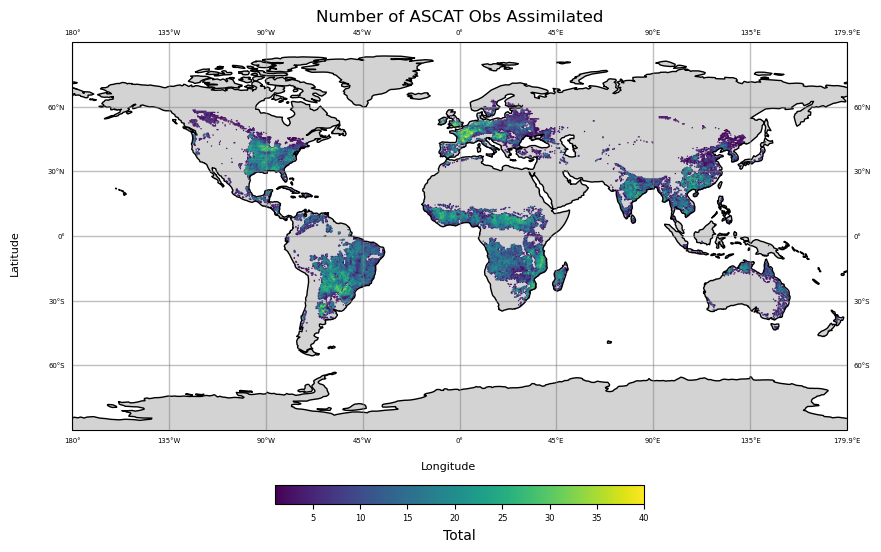

In [14]:
    obarray = np.empty([num_unique_tilenum, 3])
    obarray[:, 1] = lon_tilenum
    obarray[:, 2] = lat_tilenum
    obarray[:, 0] = num_obs
    
    plot_global(obarray,False,'Number of ASCAT Obs Assimilated','Total')